## Minimal analysis: demo with fake data

Shiny app: https://avillachlab.shinyapps.io/demo2/

In [5]:
##########################
# R package installation #
##########################
#install.packages( "reshape2", repos="http://cran.us.r-project.org" )
#install.packages( "ggplot2" )
library( "reshape2" )
library( "ggplot2" )

In [6]:
################
# Daily Counts #
################
dailyCounts <- read.delim("./DailyCounts-FMC.csv", 
                    header = FALSE, sep = ",")
colnames( dailyCounts ) <- c("siteid", "date", "new_positive_cases", 
                             "patients_in_icu", "new_deaths")
head(dailyCounts)

,siteid,date,new_positive_cases,patients_in_icu,new_deaths
1,FMC,2020-03-20,5,1,-2
2,FMC,2020-03-21,7,2,-2
3,FMC,2020-03-22,10,4,-2
4,FMC,2020-03-23,13,5,-2
5,FMC,2020-03-24,15,6,-2
6,FMC,2020-03-25,27,7,-2


Using siteid, date as id variables


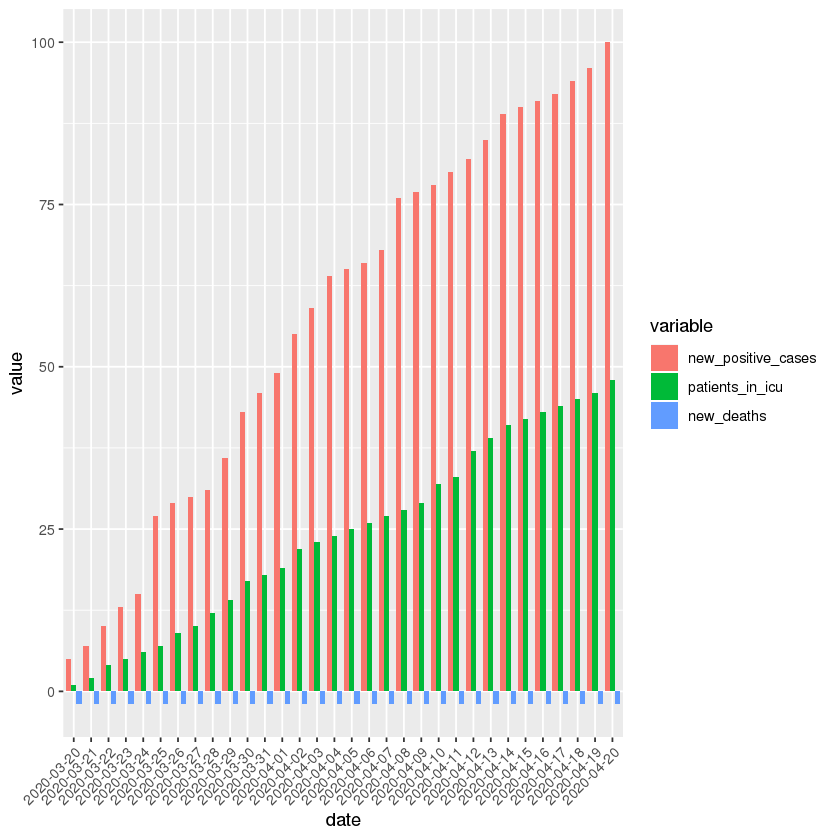

In [7]:
#transform using melt
mdaily <- melt( dailyCounts)

#plot with ggplot
ggplot(data=mdaily, aes(x=date, y=value, fill=variable)) +
  geom_bar(stat="identity", position=position_dodge()) + 
  theme(axis.text.x = element_text(angle =45, hjust = 1))

In [9]:
################
# Demographics #
################
demographics <- read.delim("./Demographics-FMC.csv", 
                           header = FALSE, sep = ",")
colnames( demographics ) <- c("siteid", "sex", "total_patients", 
                              "age_0to2", "age_3to5", "age_6to11", 
                              "age_12to17", "age_18to25", "age_26to49", 
                              "age_50to69", "age_70to79", "age_80plus")

head( demographics)

,siteid,sex,total_patients,age_0to2,age_3to5,age_6to11,age_12to17,age_18to25,age_26to49,age_50to69,age_70to79,age_80plus
1,FMC,Male,1109,0,5,8,12,60,135,246,303,340
2,FMC,Female,739,0,0,7,12,34,89,149,195,253
3,FMC,Other,0,0,0,0,0,0,0,0,0,0
4,FMC,All,1848,0,5,15,24,94,224,395,498,593


Using siteid, sex as id variables


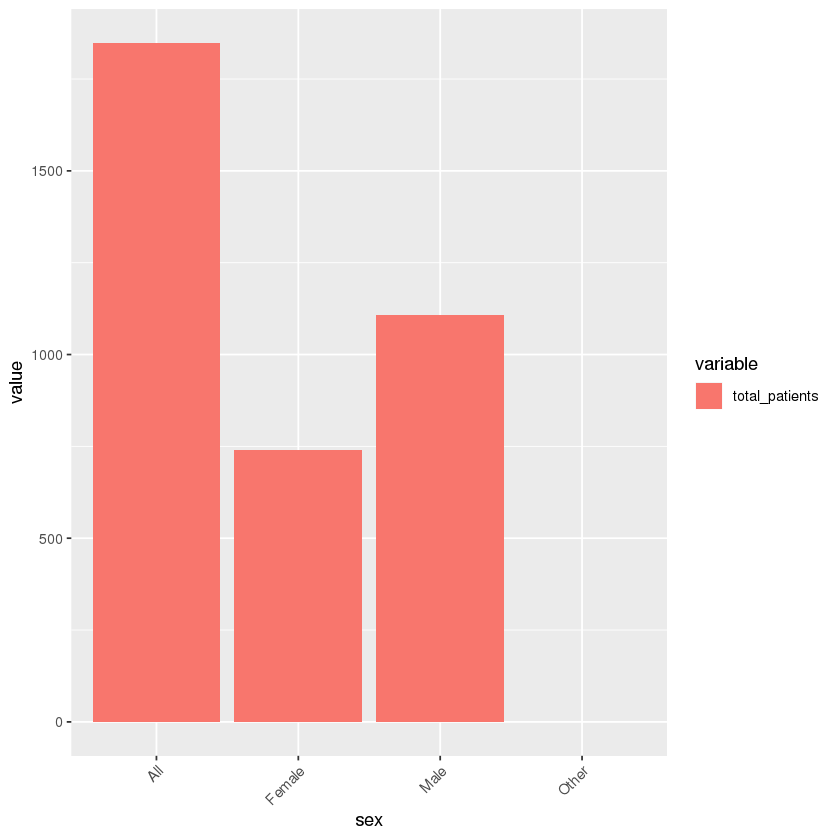

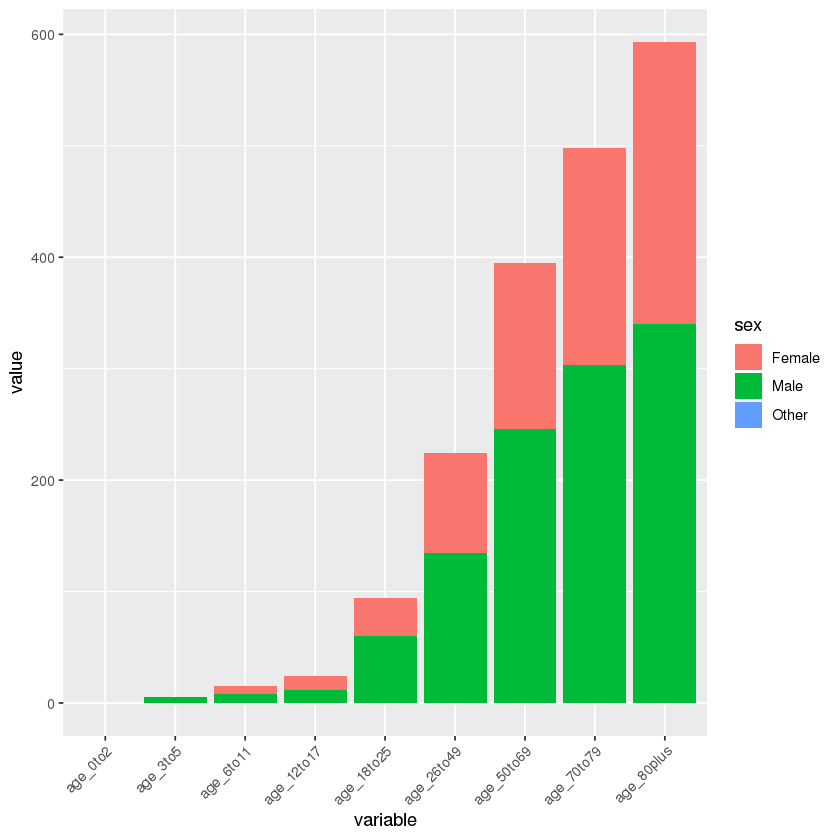

In [10]:
#transform using melt
mdemog <- melt( demographics)

#split for two different plots 
demogTotal <- mdemog[ mdemog$variable == "total_patients", ]
demogByAge <- mdemog[ mdemog$variable != "total_patients", ]


#plot with ggplot
ggplot(data=demogTotal, aes(x=sex, y=value, fill=variable)) +
  geom_bar(stat="identity", position=position_dodge()) + 
  theme(axis.text.x = element_text(angle =45, hjust = 1))


ggplot(data=demogByAge[demogByAge$sex !="All",], aes(x=variable, y=value, fill=sex)) +
  geom_bar(stat="identity", position="stack") + 
  theme(axis.text.x = element_text(angle =45, hjust = 1))

In [11]:
##############
# Laboratory #
##############
laboratory <- read.delim("./Labs-FMC.csv", 
                          header = FALSE, sep = ",")
colnames(laboratory) <- c("siteid", "loinc", "days_since_positive", 
                          "num_patients", "mean_value", "stdev_value")
labMap <- read.delim("./labMap.csv", sep = ",")


laboratory <- merge( laboratory, labMap)
head(laboratory)

,loinc,siteid,days_since_positive,num_patients,mean_value,stdev_value,labTest
1,1751-7,FMC,1,1,7,1,albumin
2,1751-7,FMC,0,-1,31.2,3.567,albumin
3,1751-7,FMC,1,6,17.1,18.876,albumin
4,1751-7,FMC,1,8,19.2,30.15,albumin
5,1920-8,FMC,-2,-1,27,1,aspartate aminotransferase (AST)
6,1920-8,FMC,-1,4,41.2,23.567,aspartate aminotransferase (AST)


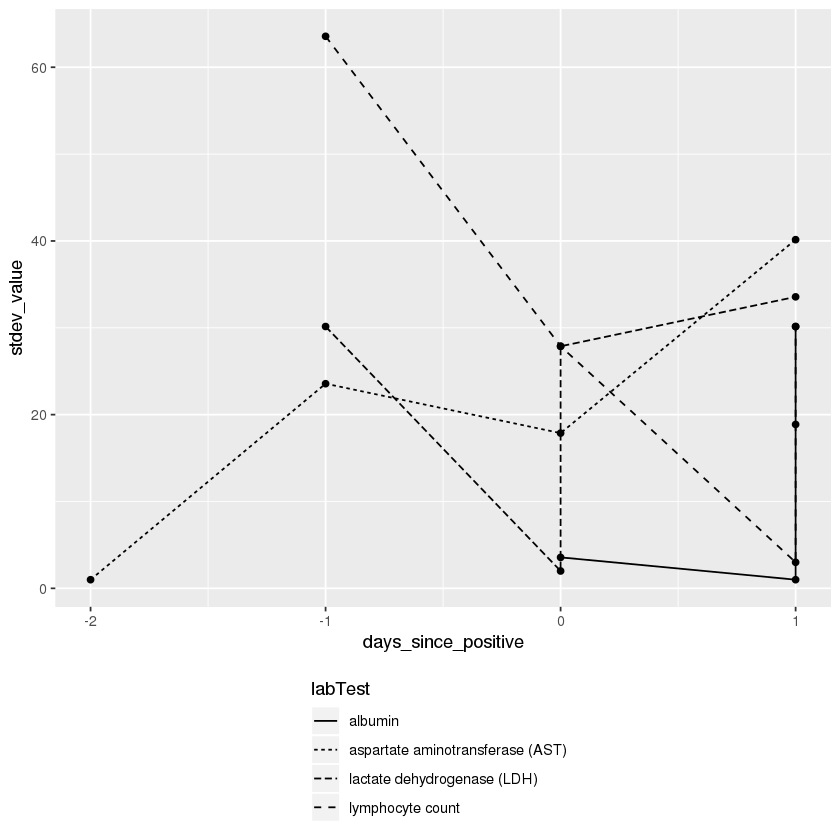

In [12]:
ggplot(data=laboratory, aes(x=days_since_positive, 
                            y=stdev_value, 
                            group=labTest)) +
  geom_line(aes(linetype=labTest))+
  geom_point() + theme(legend.position="bottom", legend.direction="vertical")

In [13]:
#############
# Diagnosis #
#############
diagnosis <- read.delim("./Diagnoses-FMT.csv", 
                        header = FALSE, sep = ",", colClasses = "character")
colnames(diagnosis) <- c("siteid", "icd_code", "icd_version", "num_patients")

diagnosis$num_patients <- as.numeric( diagnosis$num_patients)

head( diagnosis )

,siteid,icd_code,icd_version,num_patients
1,FMT,91,9,-1
2,FMT,37,9,36
3,FMT,70,9,-1
4,FMT,112,9,61
5,FMT,J12.89,10,-1
6,FMT,J20.8,10,42


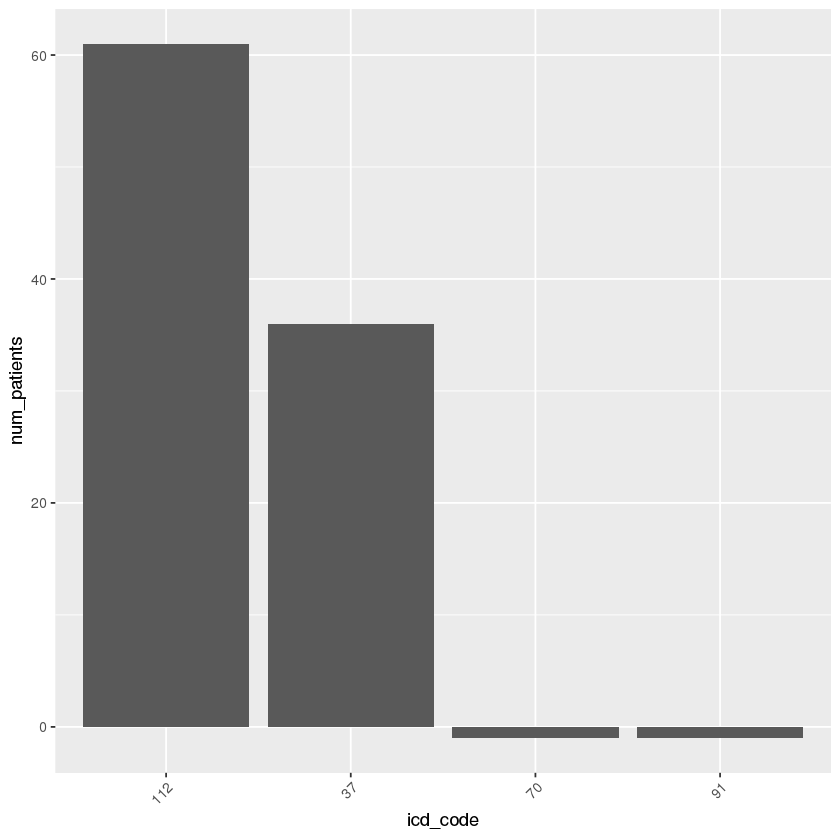

In [14]:
#example for ICD9
diagSelection <- diagnosis[ diagnosis$icd_version == 9, ]

ggplot(data=diagSelection, aes(x=icd_code, y=num_patients)) +
  geom_bar(stat="identity", position=position_dodge()) + 
  theme(axis.text.x = element_text(angle =45, hjust = 1))